#                                       DIABETES PREDICTION

by
Lakshman R
Anmol P

introduction


IMPORTING LIBRARIES

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix , classification_report
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# IMPORTING DATA(DIABETES DATA)

In [3]:
data = pd.read_csv("diabetes.csv")

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


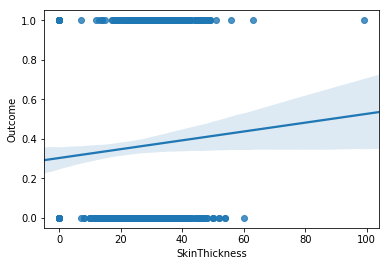

In [5]:
sns.regplot(x=data['SkinThickness'],y=data['Outcome'],data=data)

plt.show()

As the the relation is strong between output and the skinthickness we drop it from the data set

In [6]:
data = data.drop(["SkinThickness"],axis=1)

# SPLITING OF DATA INTO X AND Y

In [7]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
y = y.replace([0,1],["NOT SUFFERING","SUFFERING"])

In [8]:
x.head()


,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,0,33.6,0.627,50
1,1,85,66,0,26.6,0.351,31
2,8,183,64,0,23.3,0.672,32
3,1,89,66,94,28.1,0.167,21
4,0,137,40,168,43.1,2.288,33


In [9]:
y.head()

0        SUFFERING
1    NOT SUFFERING
2        SUFFERING
3    NOT SUFFERING
4        SUFFERING
Name: Outcome, dtype: object

# Visualization Of Data

In [10]:
data.corr()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.088933,0.281805,0.041265,0.239528,0.065068
Insulin,-0.073535,0.331357,0.088933,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.130548,0.292695,0.173844,0.238356,1.000000


Number Of Patients Not Suffering From Diabetes : 500
Number Of Patients Suffering From Diabetes : 268


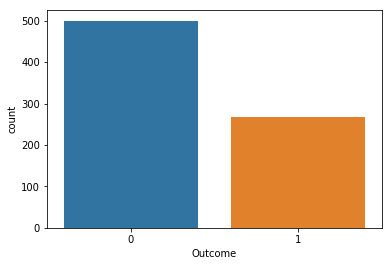

In [11]:
sns.countplot(data = data, x = "Outcome",label="count")
S,NS = data["Outcome"].value_counts()
print("Number Of Patients Not Suffering From Diabetes :",S )
print("Number Of Patients Suffering From Diabetes :",NS)

In [12]:
pos=data[(data['Outcome'])>0]



In [13]:
neg=data[(data['Outcome'])==0]



In [14]:
dn1=np.arange(268)

In [15]:
pos=pos.set_index(dn1)
pos['index1']=dn1
pos.index.name='index'
pos.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,index1
index,,,,,,,,,
0,6,148,72,0,33.6,0.627,50,1,0
1,8,183,64,0,23.3,0.672,32,1,1
2,0,137,40,168,43.1,2.288,33,1,2
3,3,78,50,88,31.0,0.248,26,1,3
4,2,197,70,543,30.5,0.158,53,1,4


In [16]:

dn=np.arange(500)

In [17]:
neg=neg.set_index(dn)
neg['index1']=dn
w=neg.head(268)

In [18]:
neg=pd.DataFrame(neg.head(268))


In [19]:
ff=pd.merge(pos,neg,on='index1',how='inner')

In [20]:
ft=pd.DataFrame(ff)
ft.head()


,Pregnancies_x,Glucose_x,BloodPressure_x,Insulin_x,BMI_x,DiabetesPedigreeFunction_x,Age_x,Outcome_x,index1,Pregnancies_y,Glucose_y,BloodPressure_y,Insulin_y,BMI_y,DiabetesPedigreeFunction_y,Age_y,Outcome_y
0,6,148,72,0,33.6,0.627,50,1,0,1,85,66,0,26.6,0.351,31,0
1,8,183,64,0,23.3,0.672,32,1,1,1,89,66,94,28.1,0.167,21,0
2,0,137,40,168,43.1,2.288,33,1,2,5,116,74,0,25.6,0.201,30,0
3,3,78,50,88,31.0,0.248,26,1,3,10,115,0,0,35.3,0.134,29,0
4,2,197,70,543,30.5,0.158,53,1,4,4,110,92,0,37.6,0.191,30,0


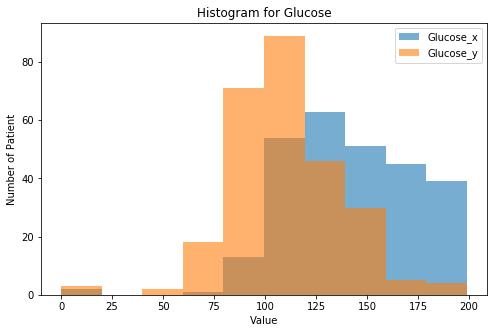

In [21]:
ff[['Glucose_x','Glucose_y']].plot(kind='hist',bins=10,alpha=.6, figsize=(8, 5))

plt.title('Histogram for Glucose') # add a title to the histogram
plt.ylabel('Number of Patient') # add y-label
plt.xlabel('Value') # add x-label

plt.show()

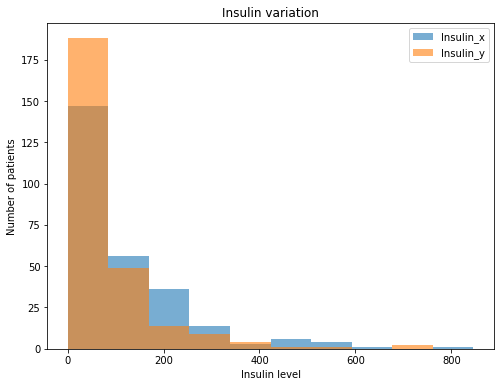

In [22]:
ff[['Insulin_x','Insulin_y']].plot(kind='hist', alpha=.6,figsize=(8, 6))

plt.title('Insulin variation')
plt.ylabel('Number of patients')
plt.xlabel('Insulin level')
plt.show()

In [23]:
a=data['Glucose'].duplicated

Text(0.5,0,'outcome 0')

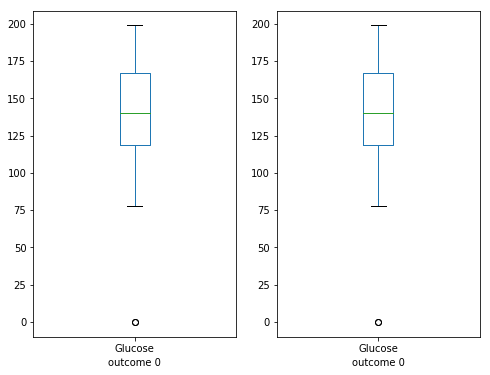

In [24]:
plt.subplot(1,2,1)
pos['Glucose'].plot(kind='box', figsize=(8, 6))
plt.xlabel('outcome 0')

plt.subplot(1,2,2)
pos['Glucose'].plot(kind='box', figsize=(8, 6))
plt.xlabel('outcome 0')



In [25]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(pos['Glucose'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[ 2  0  0  1 13 54 63 51 45 39]
[  0.   19.9  39.8  59.7  79.6  99.5 119.4 139.3 159.2 179.1 199. ]


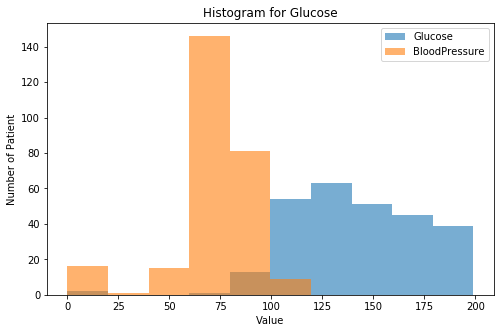

In [26]:
pos[['Glucose','BloodPressure']].plot(kind='hist',bins=10,alpha=.6, figsize=(8, 5))

plt.title('Histogram for Glucose') # add a title to the histogram
plt.ylabel('Number of Patient') # add y-label
plt.xlabel('Value') # add x-label

plt.show()

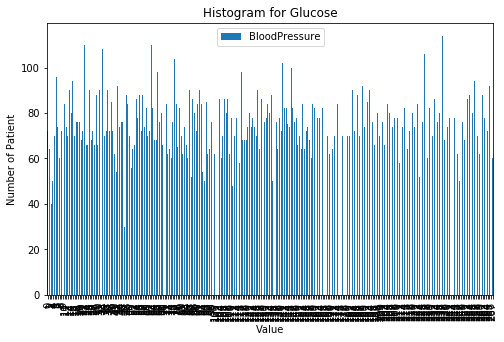

In [27]:
pos[['BloodPressure']].plot(kind='bar', figsize=(8, 5))

plt.title('Histogram for Glucose') # add a title to the histogram
plt.ylabel('Number of Patient') # add y-label
plt.xlabel('Value') # add x-label

plt.show()

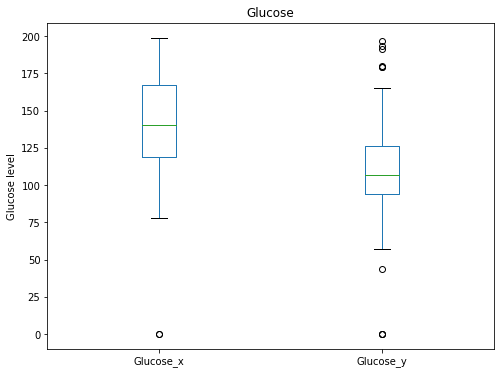

In [28]:
ff[['Glucose_x','Glucose_y']].plot(kind='box', figsize=(8, 6))

plt.title('Glucose')
plt.ylabel('Glucose level')

plt.show()

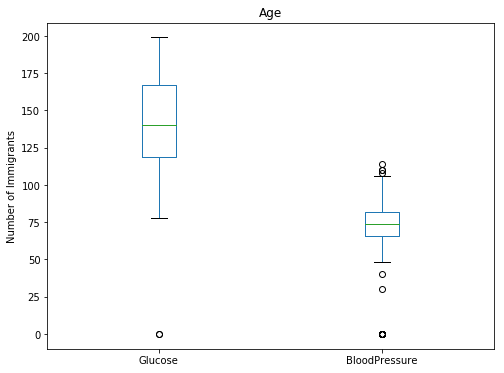

In [29]:
pos[['Glucose','BloodPressure']].plot(kind='box', figsize=(8, 6))

plt.title('Age')
plt.ylabel('Number of Immigrants')

plt.show()

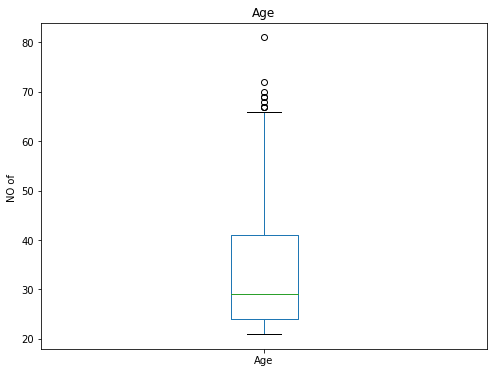

In [30]:
data[['Age']].plot(kind='box', figsize=(8, 6))

plt.title('Age')
plt.ylabel('NO of ')

plt.show()

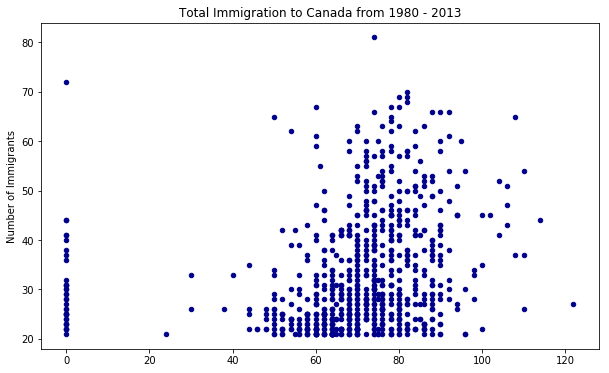

In [31]:
data[['Age','BloodPressure']].plot(kind='scatter', x='BloodPressure', y='Age', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('')
plt.ylabel('Number of Immigrants')

plt.show()

In [32]:
c = data['Glucose']      # year on x-axis
b = data['Outcome']     # total on y-axis


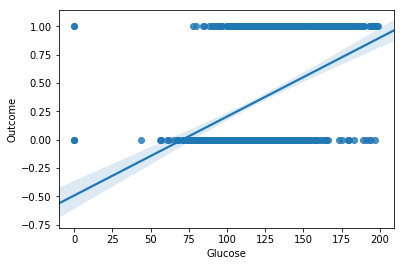

In [33]:
sns.regplot(x=c,y=b,data=data)

plt.show()



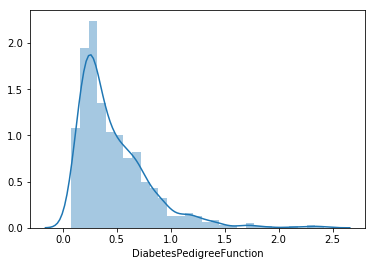

In [34]:
sns.distplot(x["DiabetesPedigreeFunction"])

# SPLITTING DATA IN TRAINING SET AND TEST SET

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.7,random_state = 0)

In [36]:
x_test.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199,76,0,42.9,1.394,22
122,2,107,74,100,33.6,0.404,23
113,4,76,62,0,34.0,0.391,25
14,5,166,72,175,25.8,0.587,51
529,0,111,65,0,24.6,0.660,31


# KNN ALGORITHM


Initialization

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score as cs

/anaconda3/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [38]:

knn = KNeighborsClassifier(n_neighbors = 18 )
score1=cs(knn,x,y,cv=10,scoring='accuracy').mean()
score1


0.7670027341079972

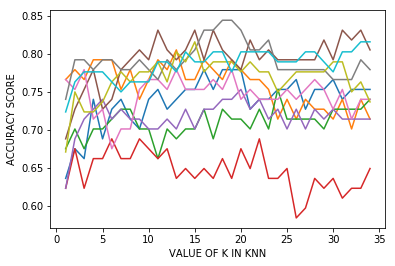

In [39]:
k_range = range(1,35)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    score=cs(knn,x,y,cv=10,scoring='accuracy')
    scores.append(score)
plt.plot(k_range,scores)
plt.xlabel("VALUE OF K IN KNN")
plt.ylabel("ACCURACY SCORE")
plt.show()

In [40]:

classifier_knn = KNeighborsClassifier(n_neighbors = 13 , metric = "minkowski",p=2)
classifier_knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

Classification And Prediction

Prediction Using Real Data

In [41]:
y_pred_knn = classifier_knn.predict(x_test)
accuracy_knn_diabetes = accuracy_score(y_pred_knn,y_test)
#cy_score(y_pred_knn,y_test)
cm_knn_diabetes = confusion_matrix(y_pred_knn,y_test)
print("Accuracy Of KNN Model Is :",accuracy_knn_diabetes)
print(cm_knn_diabetes)

Accuracy Of KNN Model Is : 0.7806691449814126
[[304  75]
 [ 43 116]]


Analysing

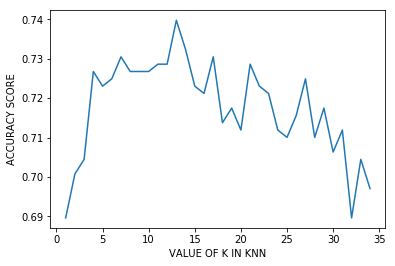

0.8157894736842105

In [42]:
k_range = range(1,35)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))
plt.plot(k_range,scores)
plt.xlabel("VALUE OF K IN KNN")
plt.ylabel("ACCURACY SCORE")
plt.show()
score.max()

In [43]:
 print(classification_report(y_test,y_pred_knn))

               precision    recall  f1-score   support

NOT SUFFERING       0.80      0.88      0.84       347
    SUFFERING       0.73      0.61      0.66       191

  avg / total       0.78      0.78      0.78       538



In [ ]:
s1=knn.score(x,y)
s1

0.7018229166666666

# Prediction Using User Data

In [ ]:
 name = input("Name Of The Patient : ").capitalize()
a = int(input("Age : " ))
gender = input("Gender : ").lower()
p = 0
if(a < 12):
     print(name ,"Your Not Eligible For This Test")
else:
    if(gender == "male"):
        p = 0
    else:
        p = float(input("number of pregnancies undergone :"))
   
   
    g = float(input("Glucose Level in mg/dL : "))
    b = float(input("Blood Pressure Level : "))
    i = float(input("Insulin Level : "))
    bm = float(input("BMI :"))
    d = float(input("Diabetes Pedigree Function : "))

       

##### PREDICTION ON REAL DATA AND ANALYSIS

In [ ]:
y_pred_1 = classifier_knn.predict([[p,g,b,i,bm,d,a]])

#ANALYSIS GLUCOSE LEVEL
print("GLUCOSE LEVEL : ")
if(g < 90):
    print("\t""less than Optimal level ")
if(g > 125):
    print("\t""more than Optimal level")
print("\t""optimal glucose level :""\t", "90.0-125.0")
print("\t""your glucose level :""\t",g)
print("\n")
#ANALYSIS BLOOD PRESSURE LEVEL
print("BLOOD PRESSURE : ")
if(b < 80):
    print(" Blood Pressure level is less than Optimal level ")
if(b > 120):
    print("\t""More than Optimal level")
print("\t""optimal blood pressure level :""\t", "80.0-120.0")
print("\t""your blood pressure level :""\t",b)
print("\n")
#ANALYSIS INSULIN LEVEL
print("INSULIN : ")
if(i < 50):
    print("your Insulin level is less than Optimal level ")
if(i > 276):
    print("your Insulin is more than Optimal level")
print("\t""optimal insulin level :""\t", "50.0-276.0")
print("\t""your insulin level :""\t",i)
print("\n")
#ANALYSIS BMI(BODY MASS INDEX) LEVEL
print("BMI : ")
if(bm < 18.5):
    print("\t""less than Optimal level ")
if(bm > 24.9):
    print("\t""more than Optimal level")
print("\t""optimal BMI level :""\t", "18.0-276.0")
print("\t""your BMI level : ","\t",bm)


print("\n")

if(y_pred_1 == "NOT SUFFERING"):
    print(name,"your not suffering from DIABETES")
else:
    print(name ,"you are suffering from DIABETES")
    print("\n")

# DECISION TREE

Intialization

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_dtc = DecisionTreeClassifier(criterion = "entropy")
classifier_dtc.fit(x_train,y_train)

Creating Model and Determing Accuracy

In [ ]:
score2=cs(classifier_dtc,x,y,cv=10,scoring='accuracy').mean()
score2

In [ ]:
y_pred_dtc = classifier_dtc.predict(x_test)
accuracy_dtc_diabetes = accuracy_score(y_pred_dtc,y_test)
cm_dtc_diabetes = confusion_matrix(y_pred_dtc,y_test)
print("Accuracy of Decision Tree:",accuracy_dtc_diabetes)
print(cm_knn_diabetes)

In [ ]:
s2=classifier_dtc.score(x,y)
s2

Predicting the Results

In [ ]:
y_pred_1 = classifier_dtc.predict([[p,g,b,i,bm,d,a]])
print(y_pred_1)

# NAIVE BAYES


Initialization

In [ ]:

from sklearn.naive_bayes import GaussianNB 
classifier_nv = GaussianNB()
classifier_nv.fit(x_train,y_train) 


Creating Model And Finding Accuracy


In [ ]:
score3=cs(classifier_nv,x,y,cv=10,scoring='accuracy').mean()
score3

In [ ]:
 y_pred_nb = classifier_nv.predict(x_test)
accuracy_nb_diabetes = accuracy_score(y_pred_nb,y_test)
cm_nb_diabetes = confusion_matrix(y_pred_nb,y_test)

print("Accuracy Of Naive Bayes:",accuracy_nb_diabetes)
print(cm_nb_diabetes)

In [ ]:
s3=classifier_nv.score(x,y)
s3

Prediction Using Real Data

In [ ]:

y_pred_3 = classifier_nv.predict([[p,g,b,i,bm,d,a]])
print(y_pred_3)


# LOGISTIC REGRESSION


Initialization

In [ ]:
from sklearn.linear_model import LogisticRegression 
classifier_lr = LogisticRegression(random_state = 0) 
classifier_lr.fit(x,y)



In [ ]:
score4=cs(classifier_lr,x,y,cv=10,scoring='accuracy').mean()
score4

Creating Model

In [ ]:
y_pred_lr = classifier_lr.predict(x_test)
accuracy_lr_diabetes = accuracy_score(y_pred_lr,y_test)
cm_lr_diabetes = confusion_matrix(y_pred_lr,y_test)
print("Accuracy Of Logistic Regression:",accuracy_lr_diabetes)
print(cm_lr_diabetes)


In [ ]:
s4=classifier_lr.score(x,y)
s4

Predicting Using Real Data

In [ ]:

y_pred_2 = classifier_lr.predict([[p,g,b,i,bm,d,a]])
print(y_pred_2)

#  SVC

Intialization

In [ ]:


from sklearn.svm import SVC
classifier_svc = SVC(kernel = "rbf",random_state = 0) 
classifier_svc.fit(x_train,y_train)


Creating Model And Determining Accuracy

In [ ]:
score5=cs(classifier_svc,x,y,cv=10,scoring='accuracy').mean()
score5

In [ ]:

y_pred_svc = classifier_svc.predict(x_test)
accuracy_svc_diabetes = accuracy_score(y_pred_svc,y_test)
cm_svc_diabetes = confusion_matrix(y_pred_svc,y_test)

print("Accuracy Of SVC:",accuracy_svc_diabetes)
print(cm_svc_diabetes)


In [ ]:
s5=classifier_svc.score(x,y)
s5

Prediction Using Real Data

In [ ]:

y_pred_4 = classifier_svc.predict([[p,g,b,i,bm,d,a]])
print(y_pred_4)

# Comparing the Algorithms

In [ ]:
DD=DataFrame({'acurracy':[accuracy_knn_diabetes,accuracy_dtc_diabetes,accuracy_nb_diabetes,accuracy_lr_diabetes,
                          accuracy_svc_diabetes]
            ,'Cross validation':[score1,score2,score3,score4,score5]
             ,'R^2 value':[s1,s2,s3,s4,s5]},
             index=['KNN','Dission Tree','Navi bayes','LR','SVC'])

In [ ]:
DD

In [ ]:
DD[['acurracy']].plot(kind='bar', figsize=(8, 5))

plt.title('COMPARING ACCURACY OF ALGORITHMS') # add a title to the histogram
plt.ylabel('ACCURACY') # add y-label
plt.xlabel('ALGORITHMS') # add x-label

plt.show()